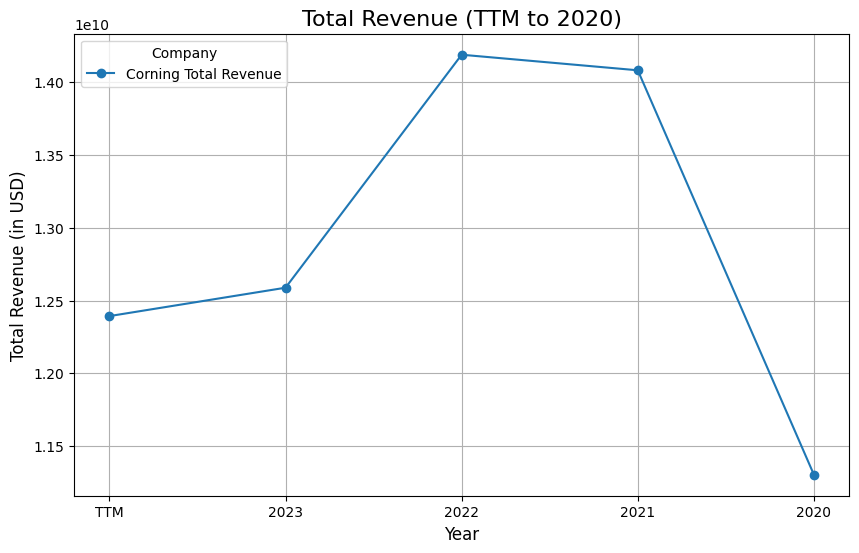

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 定義公司名稱及代號
companies = {"Corning": "GLW"}

# 設置抓取資料的年份範圍
years = [2020, 2021, 2022, 2023]  # 包括四個完整年份
ttm_year = 'TTM'  # TTM 資料

# 儲存財務數據的字典
financial_data = {}

# 遍歷公司，抓取每家公司的財務數據
for company, ticker in companies.items():
    stock_data = yf.Ticker(ticker)
    financials = stock_data.financials.T  # 財務數據轉置，行列對調
    
    # 創建一個空的字典來儲存每年的數據
    revenue_data = {ttm_year: None}
    revenue_data.update({year: None for year in years})
    
    # 嘗試獲取 TTM 資料
    info = stock_data.info
    ttm_revenue = info.get('totalRevenue')  # 有些公司沒有提供 TTM 資料

    if ttm_revenue is not None:
        revenue_data[ttm_year] = ttm_revenue
    
    # 遍歷 financials 表中的每一年，抓取 Total Revenue 資料
    for date, row in financials.iterrows():
        year = date.year
        if year in revenue_data:
            revenue_data[year] = row['Total Revenue'] if 'Total Revenue' in row else None

    financial_data[company] = revenue_data

# 將數據轉換為 DataFrame 並保存成 CSV 檔案
df = pd.DataFrame(financial_data)
csv_path = '/Users/cheryl/Desktop/python/fin Analysis.csv'
df.to_csv(csv_path)
df.head()

# 進行圖示化
plt.figure(figsize=(10, 6))
for company, data in financial_data.items():
    # 提取 TTM 和每年的 Total Revenue 資料
    years_list = [ttm_year] + sorted(years, reverse=True)
    revenues = [data.get(ttm_year, 0)] + [data.get(year, 0) for year in sorted(years, reverse=True)]

    plt.plot(years_list, revenues, marker='o', label=f"{company} Total Revenue")

# 設置圖表標題和軸標籤
plt.title('Total Revenue (TTM to 2020)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue (in USD)', fontsize=12)
plt.legend(title="Company")
plt.grid(True)

# 顯示圖表
plt.show()
